In [32]:
# Import libraries
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
# Load the data
df = pd.read_csv('cancer.csv')
df.head()

,"diagnosis(1=m, 0=b)",radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
df.shape

(569, 31)

In [29]:
# Data cleaning
df.isna().sum()

diagnosis(1=m, 0=b)        0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [27]:
# Data preprocessing
X = df.drop(columns=['diagnosis(1=m, 0=b)'])
y = df['diagnosis(1=m, 0=b)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Model building
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_shape = X_train.shape[1:], activation = 'sigmoid'),
    tf.keras.layers.Dense(256, activation = 'sigmoid'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [25]:
# Model compilation
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
# Early stopping setup (to avoid overfitting)
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

In [19]:
# Model training
history = model.fit(X_train, y_train, epochs = 1000, validation_split = 0.2, callbacks = [early_stopping])

Epoch 1/1000
12/12 [==============================] - 0s 35ms/step - loss: 0.0599 - accuracy: 0.9863 - val_loss: 0.0405 - val_accuracy: 0.9780
Epoch 2/1000
12/12 [==============================] - 0s 17ms/step - loss: 0.0575 - accuracy: 0.9835 - val_loss: 0.0381 - val_accuracy: 0.9780
Epoch 3/1000
12/12 [==============================] - 0s 13ms/step - loss: 0.0584 - accuracy: 0.9863 - val_loss: 0.0257 - val_accuracy: 1.0000
Epoch 4/1000
12/12 [==============================] - 0s 20ms/step - loss: 0.0527 - accuracy: 0.9890 - val_loss: 0.0562 - val_accuracy: 0.9560
Epoch 5/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.0566 - accuracy: 0.9835 - val_loss: 0.0297 - val_accuracy: 0.9890
Epoch 6/1000
12/12 [==============================] - 0s 15ms/step - loss: 0.0539 - accuracy: 0.9890 - val_loss: 0.0359 - val_accuracy: 0.9780
Epoch 7/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.0553 - accuracy: 0.9890 - val_loss: 0.0404 - val_accuracy: 0.9780

In [22]:
# Model evaluation on unseen data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

4/4 [==============================] - 0s 8ms/step - loss: 0.0850 - accuracy: 0.9561
Test Accuracy: 95.61%


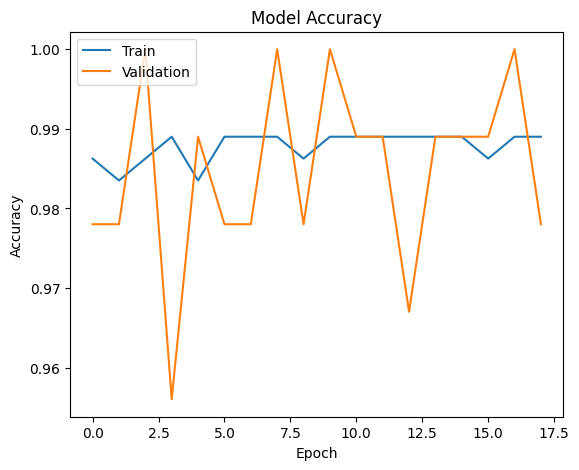

In [21]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')